In [1]:
# Install prophet library
!pip install prophet

In [2]:
#import requirements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
#Create bins for game splits
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
#Read in CSV data files
braun_df = pd.read_csv('resources/nuggets stats/braun.csv')
pope_df = pd.read_csv('resources/nuggets stats/caldwell-pope.csv')
gordon_df = pd.read_csv('resources/nuggets stats/gordon.csv')
holiday_df = pd.read_csv('resources/nuggets stats/holiday.csv')
jokic_df = pd.read_csv('resources/nuggets stats/jokic.csv')
murray_df = pd.read_csv('resources/nuggets stats/murray.csv')
porterjr_df = pd.read_csv('resources/nuggets stats/porterjr.csv')
watson_df = pd.read_csv('resources/nuggets stats/watson.csv')
conley_df = pd.read_csv('resources/timberwolves stats/conley.csv')
edwards_df = pd.read_csv('resources/timberwolves stats/edwards.csv')
gobert_df = pd.read_csv('resources/timberwolves stats/gobert.csv')
kat_df = pd.read_csv('resources/timberwolves stats/KAT.csv')
mcdaniels_df = pd.read_csv('resources/timberwolves stats/mcdaniels.csv')
morris_df = pd.read_csv('resources/timberwolves stats/morris.csv')
reid_df = pd.read_csv('resources/timberwolves stats/reid.csv')
walker_df = pd.read_csv('resources/timberwolves stats/walker.csv')
wolves_schedule = pd.read_csv('resources/wolves schedule.csv',parse_dates=True)
nuggets_schedule = pd.read_csv('resources/nuggets schedule.csv')

In [4]:
wolves_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   game    97 non-null     int64 
 1   date    97 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
#combine game dates to player stats dataframe for nuggets
braun_df = pd.concat([nuggets_schedule, braun_df], axis=1) 
pope_df = pd.concat([nuggets_schedule, pope_df], axis=1)
gordon_df = pd.concat([nuggets_schedule, gordon_df], axis=1)
holiday_df = pd.concat([nuggets_schedule, holiday_df], axis=1)
jokic_df = pd.concat([nuggets_schedule, jokic_df], axis=1)
murray_df = pd.concat([nuggets_schedule, murray_df], axis=1)
porterjr_df = pd.concat([nuggets_schedule, porterjr_df], axis=1)
watson_df = pd.concat([nuggets_schedule, watson_df], axis=1)

#combine game dates to player stats dataframe for timberwolves
conley_df = pd.concat([wolves_schedule, conley_df], axis=1)
edwards_df = pd.concat([wolves_schedule, edwards_df], axis=1)
gobert_df = pd.concat([wolves_schedule, gobert_df], axis=1)
kat_df = pd.concat([wolves_schedule, kat_df], axis=1)
mcdaniels_df = pd.concat([wolves_schedule, mcdaniels_df], axis=1)
morris_df = pd.concat([wolves_schedule, morris_df], axis=1)
reid_df = pd.concat([wolves_schedule, reid_df], axis=1)
walker_df = pd.concat([wolves_schedule, walker_df], axis=1)


Axes(0.125,0.11;0.775x0.77)
                          ds     y
0   2023-10-11T02:00:00.000Z   5.0
1   2023-10-13T00:00:00.000Z   0.0
2   2023-10-16T01:00:00.000Z  25.0
3   2023-10-18T02:30:00.000Z   6.0
4   2023-10-20T02:00:00.000Z  -3.0
..                       ...   ...
94  2024-05-11T01:30:00.000Z   NaN
95  2024-05-13T00:00:00.000Z   NaN
96  2024-05-15T02:30:00.000Z   NaN
97  2024-05-17T00:30:00.000Z   NaN
98  2024-05-19T04:00:00.000Z   NaN

[99 rows x 2 columns]
Axes(0.125,0.11;0.775x0.77)
                          ds     y
0   2023-10-11T02:00:00.000Z  -1.0
1   2023-10-13T00:00:00.000Z   6.0
2   2023-10-16T01:00:00.000Z   5.0
3   2023-10-18T02:30:00.000Z   6.0
4   2023-10-20T02:00:00.000Z  10.0
..                       ...   ...
94  2024-05-11T01:30:00.000Z   NaN
95  2024-05-13T00:00:00.000Z   NaN
96  2024-05-15T02:30:00.000Z   NaN
97  2024-05-17T00:30:00.000Z   NaN
98  2024-05-19T04:00:00.000Z   NaN

[99 rows x 2 columns]
Axes(0.125,0.11;0.775x0.77)
                          ds  

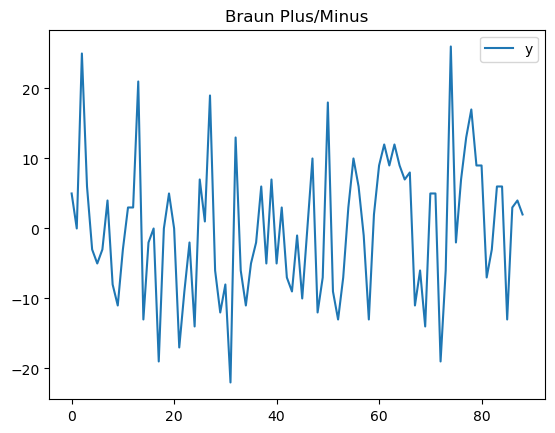

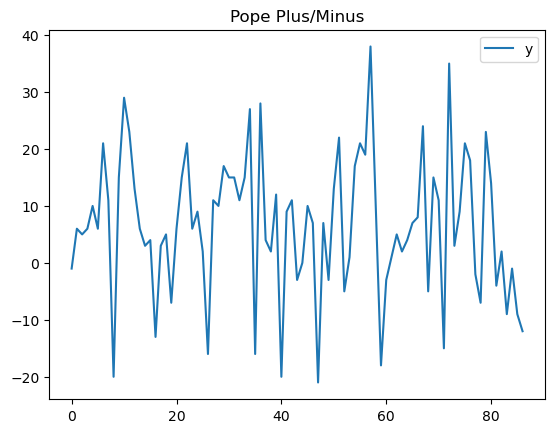

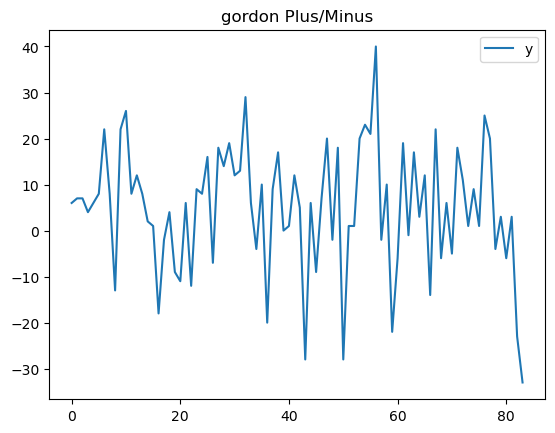

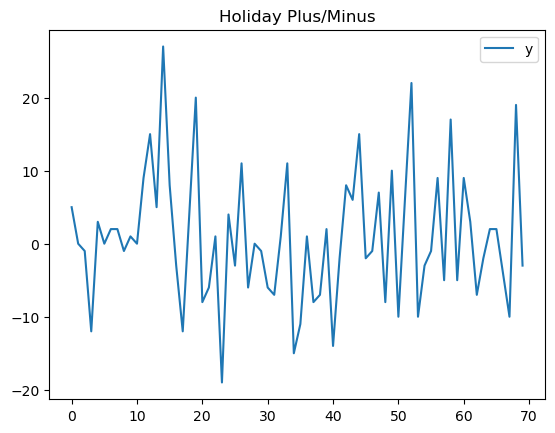

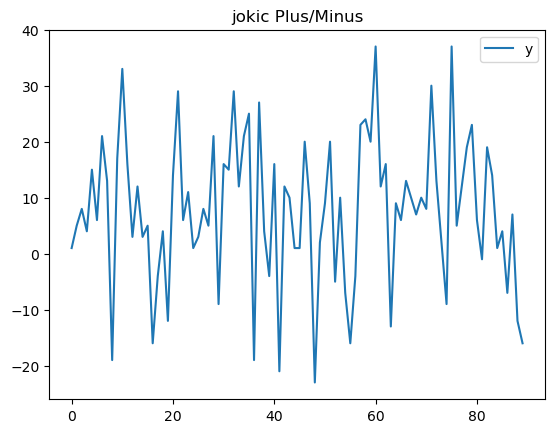

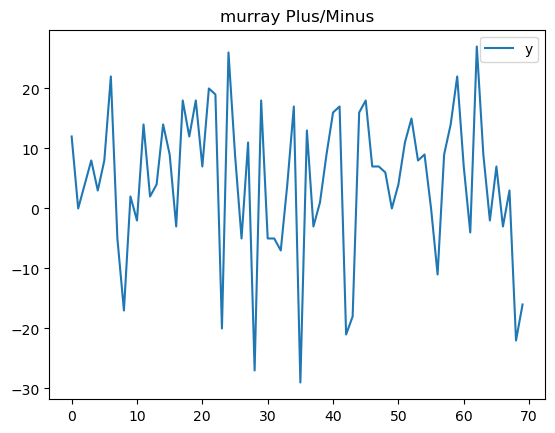

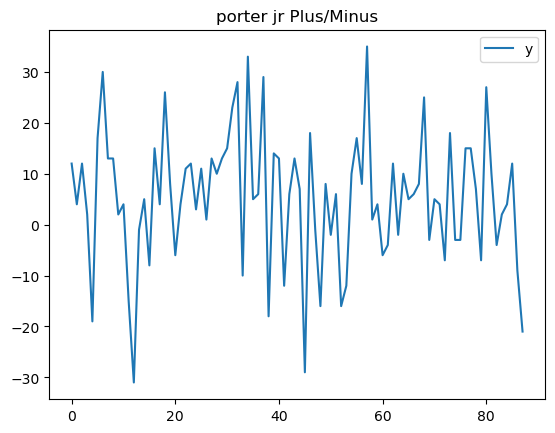

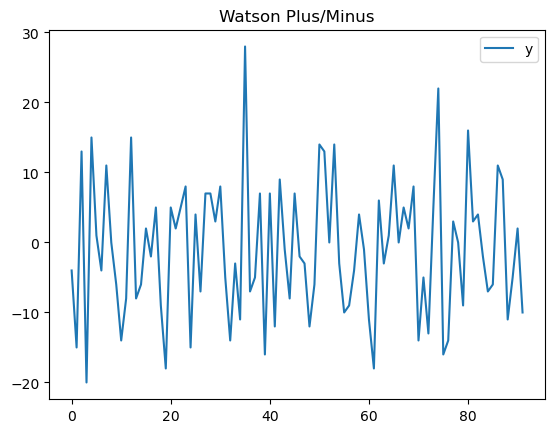

In [6]:
#nuggets player impact(as determined by plus/minus), and date, renamed to prophet syntax
braun_impact = braun_df[['date','plusMinus']]
braun_impact = braun_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(braun_impact.plot(title='Braun Plus/Minus'))
print(braun_impact)

pope_impact = pope_df[['date','plusMinus']]
pope_impact = pope_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(pope_impact.plot(title='Pope Plus/Minus'))
print(pope_impact)

gordon_impact = gordon_df[['date','plusMinus']]
gordon_impact = gordon_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(gordon_impact.plot(title='gordon Plus/Minus'))
print(gordon_impact)

holiday_impact = holiday_df[['date','plusMinus']]
holiday_impact = holiday_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(holiday_impact.plot(title='Holiday Plus/Minus'))
print(holiday_impact)

jokic_impact = jokic_df[['date','plusMinus']]
jokic_impact = jokic_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(jokic_impact.plot(title='jokic Plus/Minus'))
print(jokic_impact)

murray_impact = murray_df[['date','plusMinus']]
murray_impact = murray_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(murray_impact.plot(title='murray Plus/Minus'))
print(murray_impact)

porterjr_impact = porterjr_df[['date','plusMinus']]
porterjr_impact = porterjr_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(porterjr_impact.plot(title='porter jr Plus/Minus'))
print(porterjr_impact)

watson_impact = watson_df[['date','plusMinus']]
watson_impact = watson_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(watson_impact.plot(title='Watson Plus/Minus'))
print(watson_impact)

Axes(0.125,0.11;0.775x0.77)
                          ds     y
0   2023-10-07T16:00:00.000Z   5.0
1   2023-10-14T23:30:00.000Z -17.0
2   2023-10-18T00:00:00.000Z  -6.0
3   2023-10-20T00:00:00.000Z  21.0
4   2023-10-25T23:30:00.000Z -12.0
..                       ...   ...
92  2024-05-11T01:30:00.000Z   NaN
93  2024-05-13T00:00:00.000Z   NaN
94  2024-05-15T02:30:00.000Z   NaN
95  2024-05-17T00:30:00.000Z   NaN
96  2024-05-19T04:00:00.000Z   NaN

[97 rows x 2 columns]
Axes(0.125,0.11;0.775x0.77)
                          ds     y
0   2023-10-07T16:00:00.000Z   3.0
1   2023-10-14T23:30:00.000Z   3.0
2   2023-10-18T00:00:00.000Z   4.0
3   2023-10-20T00:00:00.000Z   0.0
4   2023-10-25T23:30:00.000Z  21.0
..                       ...   ...
92  2024-05-11T01:30:00.000Z   NaN
93  2024-05-13T00:00:00.000Z   NaN
94  2024-05-15T02:30:00.000Z   NaN
95  2024-05-17T00:30:00.000Z   NaN
96  2024-05-19T04:00:00.000Z   NaN

[97 rows x 2 columns]
Axes(0.125,0.11;0.775x0.77)
                          ds  

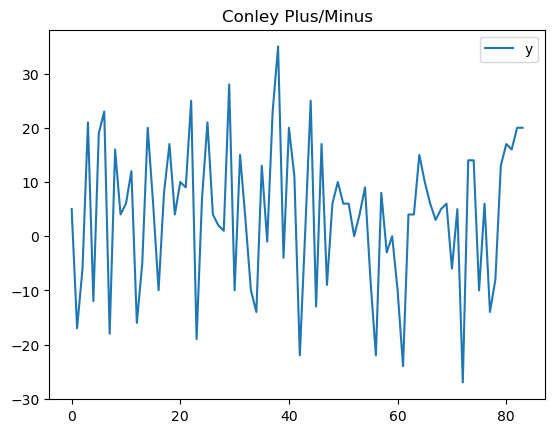

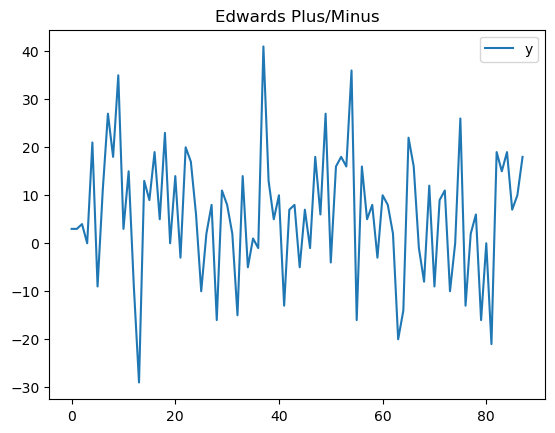

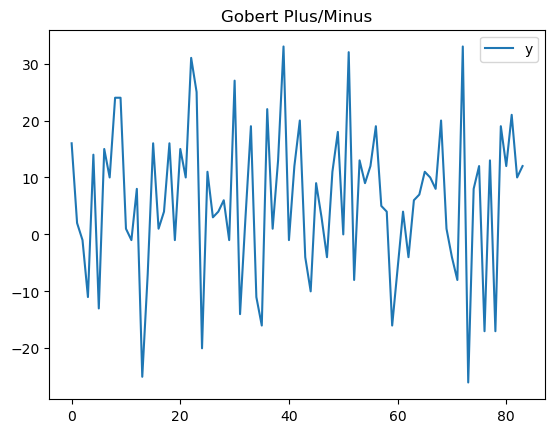

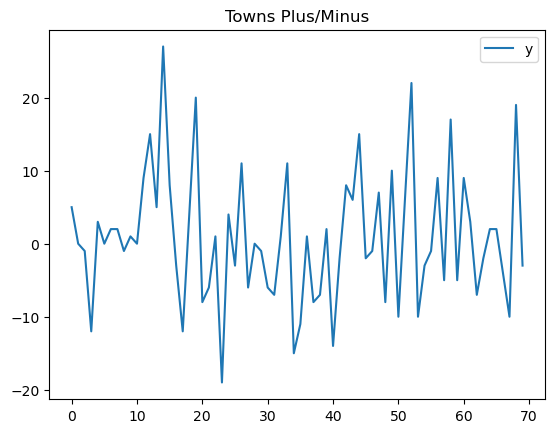

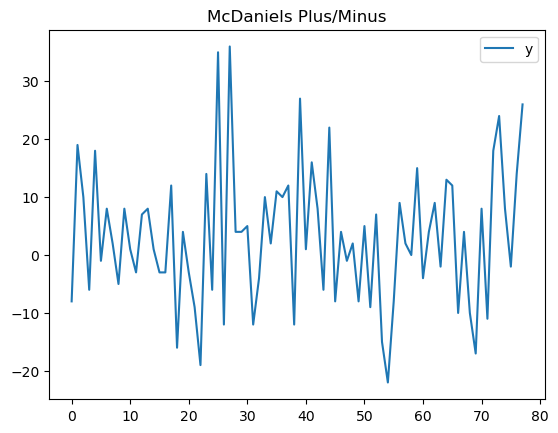

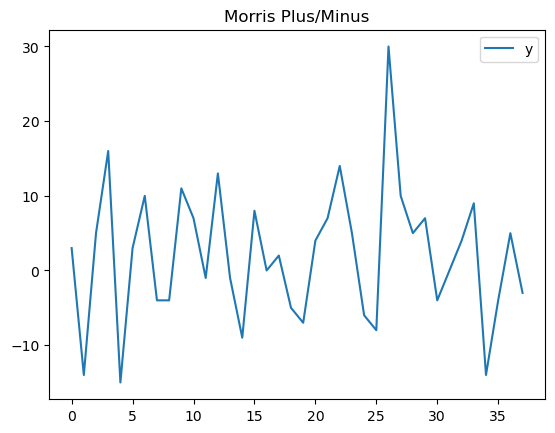

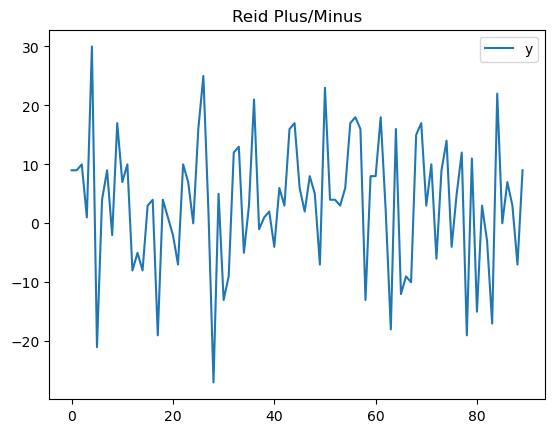

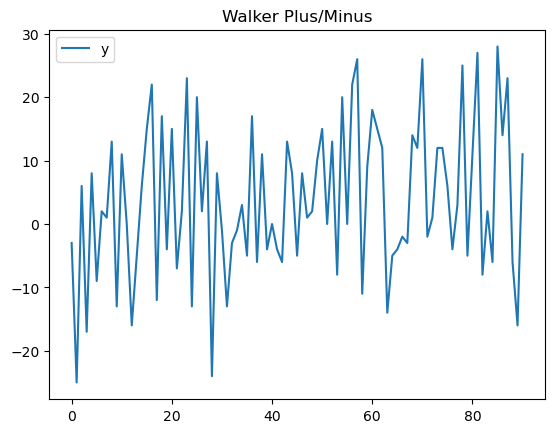

In [7]:
#timberwolves player impact(as determined by plus/minus), and date, renamed to prophet syntax
conley_impact = conley_df[['date','plusMinus']]
conley_impact = conley_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(conley_impact.plot(title='Conley Plus/Minus'))
print(conley_impact)

edwards_impact = edwards_df[['date','plusMinus']]
edwards_impact = edwards_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(edwards_impact.plot(title='Edwards Plus/Minus'))
print(edwards_impact)

gobert_impact = gobert_df[['date','plusMinus']]
gobert_impact = gobert_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(gobert_impact.plot(title='Gobert Plus/Minus'))
print(gobert_impact)

kat_impact = kat_df[['date','plusMinus']]
kat_impact = kat_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(holiday_impact.plot(title='Towns Plus/Minus'))
print(kat_impact)

mcdaniels_impact = mcdaniels_df[['date','plusMinus']]
mcdaniels_impact = mcdaniels_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(mcdaniels_impact.plot(title='McDaniels Plus/Minus'))
print(jokic_impact)

morris_impact = morris_df[['date','plusMinus']]
morris_impact = morris_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(morris_impact.plot(title='Morris Plus/Minus'))
print(morris_impact)

reid_impact = reid_df[['date','plusMinus']]
reid_impact = reid_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(reid_impact.plot(title='Reid Plus/Minus'))
print(reid_impact)

walker_impact = walker_df[['date','plusMinus']]
walker_impact = walker_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(walker_impact.plot(title='Walker Plus/Minus'))
print(walker_impact)

In [8]:
#group nuggets players stats into bins
braun_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['date','points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
braun_groups = braun_groups.rename(columns={'index':'games'})
braun_groups.plot(legend='plusMinus',title='Braun')
display(braun_groups)

pope_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
pope_groups = pope_groups.rename(columns={'index':'games'})
pope_groups.plot(title='Caldwell-Pope')
display(pope_groups)

gordon_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gordon_groups = gordon_groups.rename(columns={'index':'games'})
gordon_groups.plot(legend='plusMinus',title='Gordon')
display(gordon_groups)

holiday_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
holiday_groups = holiday_groups.rename(columns={'index':'games'})
holiday_groups.plot(title='Holiday')
display(holiday_groups)

jokic_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
jokic_groups = jokic_groups.rename(columns={'index':'games'})
jokic_groups.plot(title='jokic')
display(jokic_groups)

murray_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
murray_groups = murray_groups.rename(columns={'index':'games'})
murray_groups.plot(title='Murray')
display(murray_groups)

porterjr_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
porterjr_groups = porterjr_groups.rename(columns={'index':'games'})
porterjr_groups.plot(title='Porter jr')
display(porterjr_groups)

watson_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
watson_groups = watson_groups.rename(columns={'index':'games'})
watson_groups.plot(title='Watson')
display(watson_groups)

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
#get and plot nuggets players plusMinus splits
braun_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
braun_plusMinus_groups = braun_plusMinus_groups.rename(columns={'index':'games'})
braun_plusMinus_groups.plot(legend='plusMinus',title='Braun plus/minus')
display(braun_plusMinus_groups)

pope_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
pope_plusMinus_groups = pope_plusMinus_groups.rename(columns={'index':'games'})
pope_plusMinus_groups.plot(title='Caldwell-Pope plus/minus')
display(pope_plusMinus_groups)

gordon_plusMinus_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gordon_plusMinus_groups = gordon_plusMinus_groups.rename(columns={'index':'games'})
gordon_plusMinus_groups.plot(legend='plusMinus',title='Gordon plus/minus')
display(gordon_plusMinus_groups)

holiday_plusMinus_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
holiday_plusMinus_groups = holiday_plusMinus_groups.rename(columns={'index':'games'})
holiday_plusMinus_groups.plot(legend='plusMinus',title='Holiday plus/minus')
display(holiday_plusMinus_groups)

jokic_plusMinus_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
jokic_plusMinus_groups = jokic_plusMinus_groups.rename(columns={'index':'games'})
jokic_plusMinus_groups.plot(legend='plusMinus',title='jokic plus/minus')
display(jokic_plusMinus_groups)

murray_plusMinus_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
murray_plusMinus_groups = murray_plusMinus_groups.rename(columns={'index':'games'})
murray_plusMinus_groups.plot(legend='plusMinus',title='Murray plus/minus')
display(murray_plusMinus_groups)

porterjr_plusMinus_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
porterjr_plusMinus_groups = porterjr_plusMinus_groups.rename(columns={'index':'games'})
porterjr_plusMinus_groups.plot(legend='plusMinus',title='Porter JR plus/minus')
display(porterjr_plusMinus_groups)

watson_plusMinus_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
watson_plusMinus_groups = watson_plusMinus_groups.rename(columns={'index':'games'})
watson_plusMinus_groups.plot(legend='plusMinus',title='Watson plus/minus')
display(watson_plusMinus_groups)

,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",9.900000,28.100000,51.350000,44.16,3.000000,4.800000,2.300000,0.700000,0.100000,3.600000
1,"(10, 20]",10.300000,29.600000,39.860000,42.68,2.500000,7.300000,1.500000,1.100000,0.100000,4.600000
2,"(20, 30]",13.900000,29.100000,53.270000,53.31,2.800000,6.100000,1.100000,1.200000,0.100000,6.800000
3,"(30, 40]",8.800000,28.500000,39.950000,39.43,2.300000,7.100000,1.900000,0.700000,0.300000,8.000000
4,"(40, 50]",9.100000,28.700000,42.030000,42.64,3.400000,6.900000,1.900000,1.300000,0.600000,3.200000
5,"(50, 60]",10.200000,28.300000,38.980000,32.50,3.400000,4.500000,1.200000,1.200000,0.000000,-1.600000
6,"(60, 70]",16.000000,29.000000,50.740000,43.51,2.200000,5.300000,2.100000,1.600000,0.300000,2.300000
7,"(70, 80]",12.700000,29.000000,44.450000,44.57,3.300000,5.000000,2.100000,1.300000,0.200000,1.000000
8,"(80, 90]",9.333333,32.333333,40.833333,36.10,3.666667,7.666667,2.666667,1.333333,0.333333,18.666667


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",25.900000,33.200000,49.980000,41.290000,6.300000,4.500000,1.800000,1.000000,0.400000,11.300000
1,"(10, 20]",24.000000,34.900000,41.230000,35.390000,5.700000,4.900000,1.900000,1.300000,0.600000,6.000000
2,"(20, 30]",26.600000,33.600000,40.870000,30.330000,4.400000,5.400000,1.700000,1.600000,0.800000,4.300000
3,"(30, 40]",26.200000,34.900000,48.050000,34.570000,5.300000,4.600000,1.900000,1.000000,0.500000,6.500000
4,"(40, 50]",25.000000,36.600000,48.430000,44.680000,4.800000,5.600000,2.400000,0.800000,0.200000,5.000000
5,"(50, 60]",28.700000,34.000000,45.100000,32.500000,5.100000,4.700000,1.300000,1.600000,0.600000,10.600000
6,"(60, 70]",27.000000,37.700000,45.320000,40.730000,7.400000,5.700000,1.700000,1.300000,1.000000,0.800000
7,"(70, 80]",23.800000,33.800000,41.680000,21.700000,4.700000,5.000000,1.300000,1.400000,0.100000,1.500000
8,"(80, 90]",29.571429,38.857143,51.171429,32.142857,6.714286,5.571429,2.428571,1.714286,0.857143,9.571429


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",11.400000,30.600000,60.780000,0.0,12.000000,1.100000,2.500000,0.8,1.500000,6.500000
1,"(10, 20]",12.600000,32.000000,61.690000,0.0,10.400000,1.200000,3.100000,0.5,2.700000,2.600000
2,"(20, 30]",13.200000,32.000000,67.310000,0.0,13.400000,1.600000,2.900000,1.0,2.200000,9.600000
3,"(30, 40]",14.000000,33.300000,69.510000,0.0,12.500000,0.600000,2.700000,0.6,1.600000,4.900000
4,"(40, 50]",15.500000,35.700000,67.760000,0.0,13.100000,1.500000,3.400000,0.3,1.900000,5.500000
5,"(50, 60]",13.800000,35.200000,67.050000,0.0,13.700000,1.400000,3.400000,0.4,2.300000,6.400000
6,"(60, 70]",14.700000,37.000000,72.140000,0.0,13.700000,1.700000,3.700000,0.8,2.200000,5.900000
7,"(70, 80]",15.500000,35.000000,67.710000,0.0,13.300000,1.800000,3.100000,1.3,1.900000,2.900000
8,"(80, 90]",11.333333,32.666667,52.766667,0.0,10.666667,1.666667,3.333333,1.0,1.666667,14.333333


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",19.000000,32.000000,45.910000,39.050000,8.900000,2.400000,3.1,0.800000,0.600000,5.700000
1,"(10, 20]",24.800000,34.300000,55.860000,51.210000,8.700000,3.800000,3.8,1.000000,0.800000,6.700000
2,"(20, 30]",20.400000,31.900000,52.640000,39.160000,9.900000,2.600000,3.2,0.600000,0.300000,4.000000
3,"(30, 40]",22.600000,32.900000,54.730000,52.190000,7.500000,3.500000,3.5,0.700000,0.300000,4.900000
4,"(40, 50]",25.100000,33.900000,51.160000,42.200000,7.900000,2.700000,2.9,0.300000,1.000000,2.600000
5,"(50, 60]",21.200000,32.400000,46.010000,38.530000,7.600000,3.100000,3.3,0.900000,0.800000,9.800000
6,"(60, 70]",17.666667,28.777778,50.088889,39.266667,7.666667,2.777778,4.0,0.333333,0.555556,2.555556
7,"(70, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",9.300000,23.700000,56.340000,23.440000,2.100000,1.200000,3.400000,0.600000,0.300000,5.4
1,"(10, 20]",11.900000,30.100000,50.230000,35.000000,2.400000,1.000000,3.800000,1.000000,1.100000,0.4
2,"(20, 30]",11.400000,31.700000,47.830000,41.000000,2.900000,1.500000,2.200000,1.100000,0.300000,5.2
3,"(30, 40]",10.600000,31.400000,46.760000,38.680000,3.300000,1.800000,3.300000,1.000000,0.100000,4.5
4,"(40, 50]",9.100000,29.100000,45.350000,27.140000,2.900000,1.200000,2.900000,0.800000,1.100000,3.4
5,"(50, 60]",10.900000,30.200000,41.680000,29.500000,5.000000,1.300000,3.500000,0.900000,0.600000,-2.5
6,"(60, 70]",10.700000,29.100000,50.170000,21.790000,3.500000,1.800000,2.500000,0.900000,0.600000,1.1
7,"(70, 80]",9.714286,33.714286,33.414286,14.285714,4.428571,1.285714,3.142857,0.714286,0.714286,11.0
8,"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",4.700000,13.000000,31.250000,18.33,1.500000,1.700000,0.300000,0.500000,0.300000,1.500000
1,"(10, 20]",5.200000,16.600000,50.860000,40.00,1.300000,2.900000,0.300000,0.600000,0.000000,0.400000
2,"(20, 30]",5.800000,15.600000,43.080000,41.00,2.400000,1.600000,0.800000,0.800000,0.500000,6.000000
3,"(30, 40]",1.142857,7.571429,15.471429,0.00,0.714286,1.142857,0.571429,0.142857,0.285714,-0.428571
4,"(40, 50]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"(50, 60]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"(60, 70]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"(70, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",14.600000,22.200000,55.480000,39.74,4.300000,1.000000,1.100000,0.900000,0.500000,6.400000
1,"(10, 20]",10.600000,20.000000,48.480000,39.00,3.700000,0.500000,2.100000,0.700000,0.700000,-2.000000
2,"(20, 30]",14.900000,24.100000,48.990000,33.08,5.300000,1.700000,2.200000,0.800000,0.500000,1.800000
3,"(30, 40]",12.600000,23.900000,52.550000,43.29,6.300000,1.300000,2.700000,0.400000,0.800000,3.300000
4,"(40, 50]",10.400000,21.500000,41.110000,47.33,3.300000,1.100000,1.900000,1.000000,1.100000,7.900000
5,"(50, 60]",11.600000,24.500000,49.420000,40.83,5.100000,0.800000,2.200000,0.600000,1.000000,7.100000
6,"(60, 70]",16.900000,28.000000,46.750000,40.84,6.800000,2.200000,2.100000,0.600000,1.500000,2.200000
7,"(70, 80]",17.000000,28.500000,44.290000,42.33,7.100000,1.900000,2.300000,1.300000,1.100000,1.700000
8,"(80, 90]",12.222222,22.666667,43.433333,33.70,3.333333,1.333333,2.222222,0.666667,0.777778,1.888889


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",4.3,19.5,29.21,29.22,2.0,2.6,1.9,0.8,0.7,-2.3
1,"(10, 20]",8.9,26.3,44.60,38.86,2.1,2.5,2.4,1.2,0.7,3.8
2,"(20, 30]",6.9,23.0,41.55,28.67,1.4,1.9,1.7,0.6,0.4,2.3
3,"(30, 40]",5.5,20.3,43.24,36.83,1.5,2.4,1.7,1.1,0.5,-0.1
4,"(40, 50]",8.5,25.6,47.66,41.35,1.9,3.3,2.1,0.7,0.3,4.2
5,"(50, 60]",7.8,22.9,36.28,38.66,3.0,2.4,1.8,0.5,0.3,8.9
6,"(60, 70]",11.8,27.2,49.55,45.83,2.7,2.7,1.3,0.9,0.8,5.1
7,"(70, 80]",8.6,22.6,46.34,43.29,1.7,1.8,1.6,0.3,0.2,5.9
8,"(80, 90]",11.1,26.8,40.82,38.92,2.3,2.7,2.0,1.2,0.6,6.9


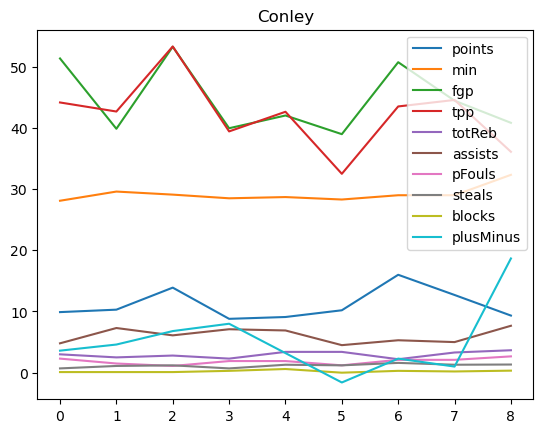

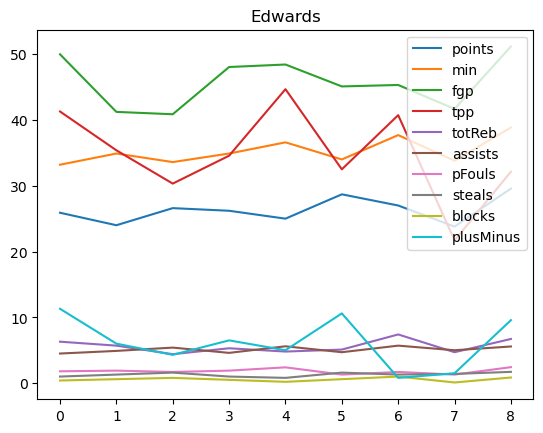

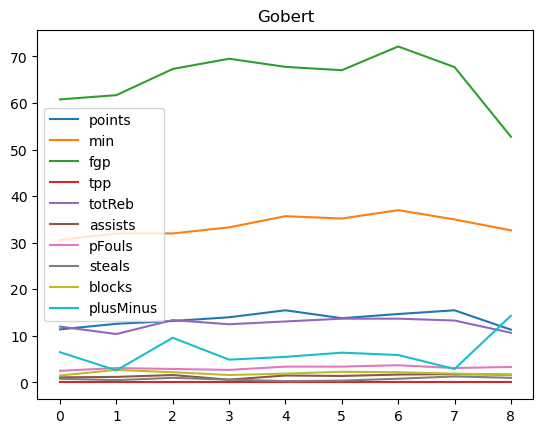

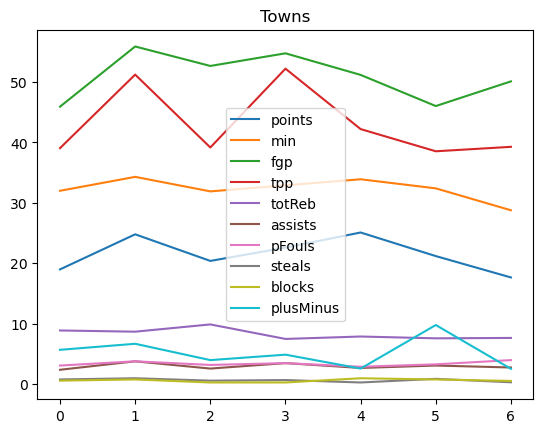

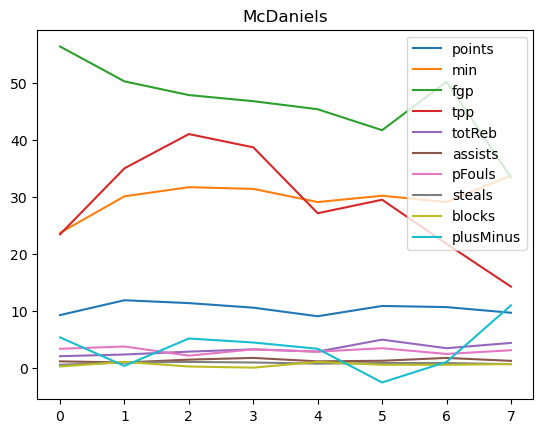

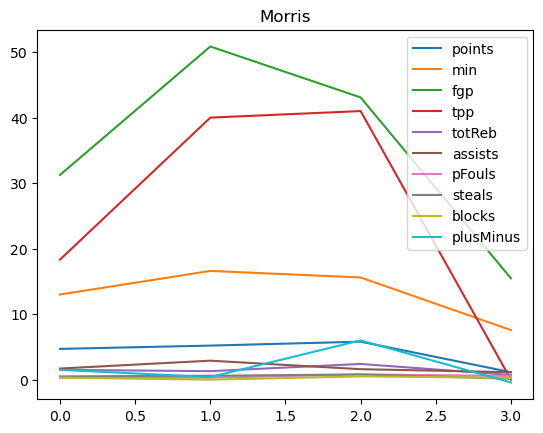

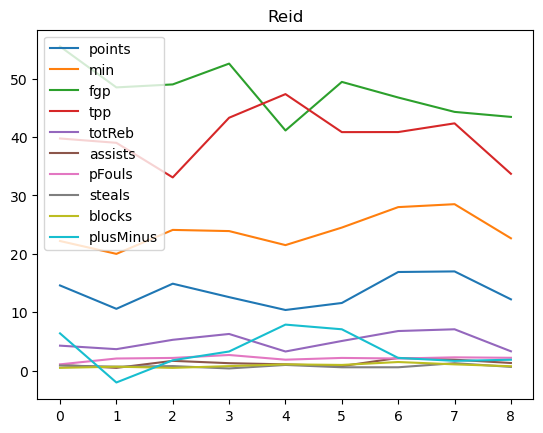

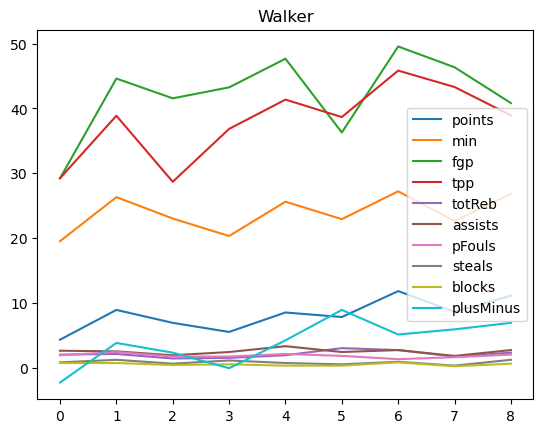

In [9]:
#get timberwolves player stat splits based on bins
conley_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
conley_groups = conley_groups.rename(columns={'index':'games'})
conley_groups.plot(title='Conley')
display(conley_groups)

edwards_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
edwards_groups = edwards_groups.rename(columns={'index':'games'})
edwards_groups.plot(title='Edwards')
display(edwards_groups)

gobert_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gobert_groups = gobert_groups.rename(columns={'index':'games'})
gobert_groups.plot(title='Gobert')
display(gobert_groups)

kat_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
kat_groups = kat_groups.rename(columns={'index':'games'})
kat_groups.plot(title='Towns')
display(kat_groups)

mcdaniels_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
mcdaniels_groups = mcdaniels_groups.rename(columns={'index':'games'})
mcdaniels_groups.plot(title='McDaniels')
display(mcdaniels_groups)

morris_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
morris_groups = morris_groups.rename(columns={'index':'games'})
morris_groups.plot(title='Morris')
display(morris_groups)

reid_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
reid_groups = reid_groups.rename(columns={'index':'games'})
reid_groups.plot(title='Reid')
display(reid_groups)

walker_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
walker_groups = walker_groups.rename(columns={'index':'games'})
walker_groups.plot(title='Walker')
display(walker_groups)

,games,plusMinus
0,"(0, 10]",3.600000
1,"(10, 20]",4.600000
2,"(20, 30]",6.800000
3,"(30, 40]",8.000000
4,"(40, 50]",3.200000
5,"(50, 60]",-1.600000
6,"(60, 70]",2.300000
7,"(70, 80]",1.000000
8,"(80, 90]",18.666667


,games,plusMinus
0,"(0, 10]",11.300000
1,"(10, 20]",6.000000
2,"(20, 30]",4.300000
3,"(30, 40]",6.500000
4,"(40, 50]",5.000000
5,"(50, 60]",10.600000
6,"(60, 70]",0.800000
7,"(70, 80]",1.500000
8,"(80, 90]",9.571429


,games,plusMinus
0,"(0, 10]",6.500000
1,"(10, 20]",2.600000
2,"(20, 30]",9.600000
3,"(30, 40]",4.900000
4,"(40, 50]",5.500000
5,"(50, 60]",6.400000
6,"(60, 70]",5.900000
7,"(70, 80]",2.900000
8,"(80, 90]",14.333333


,games,plusMinus
0,"(0, 10]",5.700000
1,"(10, 20]",6.700000
2,"(20, 30]",4.000000
3,"(30, 40]",4.900000
4,"(40, 50]",2.600000
5,"(50, 60]",9.800000
6,"(60, 70]",2.555556
7,"(70, 80]",NaN
8,"(80, 90]",NaN


,games,plusMinus
0,"(0, 10]",5.4
1,"(10, 20]",0.4
2,"(20, 30]",5.2
3,"(30, 40]",4.5
4,"(40, 50]",3.4
5,"(50, 60]",-2.5
6,"(60, 70]",1.1
7,"(70, 80]",11.0
8,"(80, 90]",NaN


,games,plusMinus
0,"(0, 10]",1.500000
1,"(10, 20]",0.400000
2,"(20, 30]",6.000000
3,"(30, 40]",-0.428571
4,"(40, 50]",NaN
5,"(50, 60]",NaN
6,"(60, 70]",NaN
7,"(70, 80]",NaN
8,"(80, 90]",NaN


,games,plusMinus
0,"(0, 10]",6.400000
1,"(10, 20]",-2.000000
2,"(20, 30]",1.800000
3,"(30, 40]",3.300000
4,"(40, 50]",7.900000
5,"(50, 60]",7.100000
6,"(60, 70]",2.200000
7,"(70, 80]",1.700000
8,"(80, 90]",1.888889


,games,plusMinus
0,"(0, 10]",-2.3
1,"(10, 20]",3.8
2,"(20, 30]",2.3
3,"(30, 40]",-0.1
4,"(40, 50]",4.2
5,"(50, 60]",8.9
6,"(60, 70]",5.1
7,"(70, 80]",5.9
8,"(80, 90]",6.9


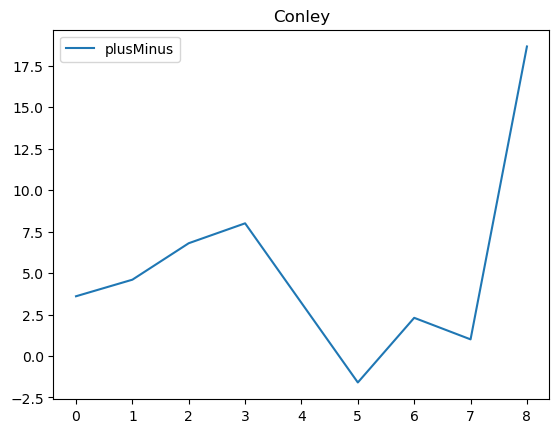

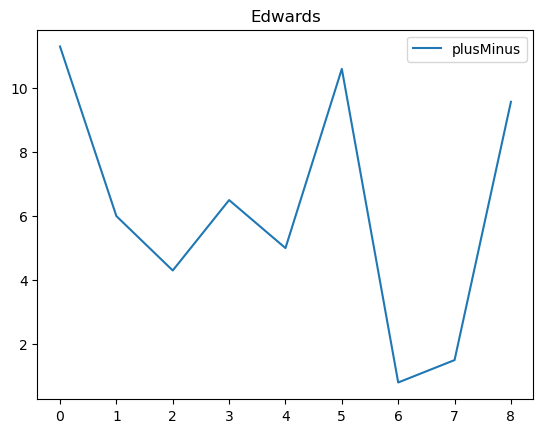

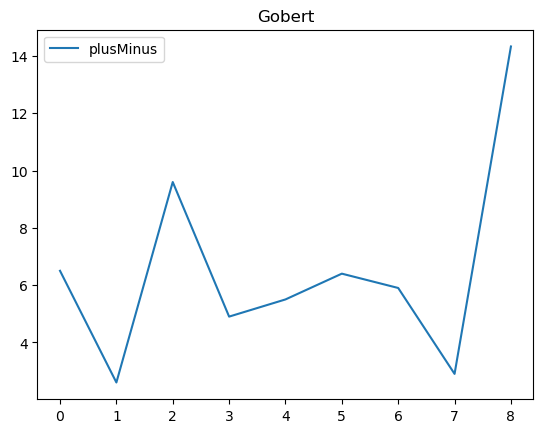

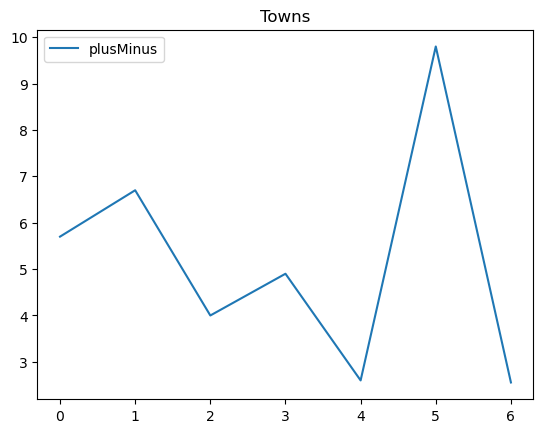

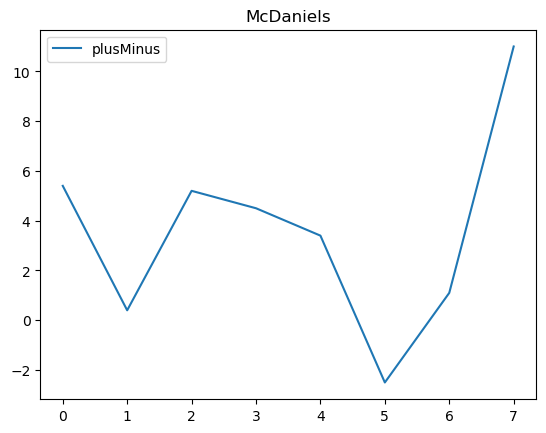

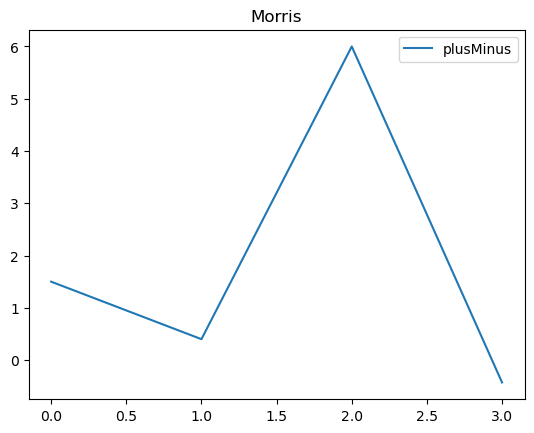

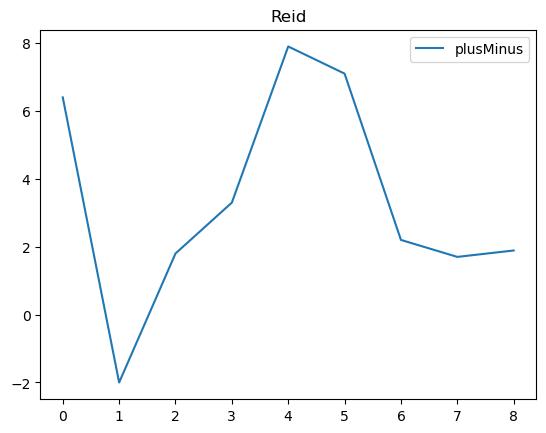

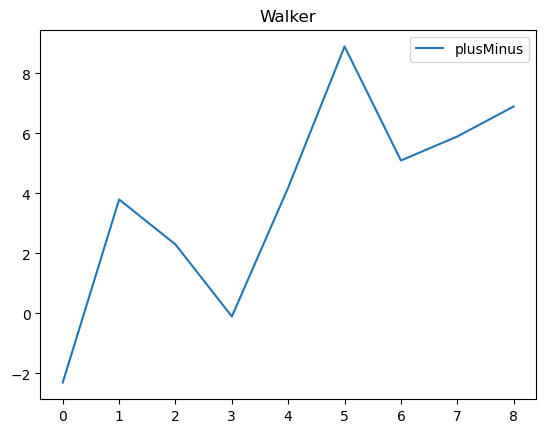

In [10]:
#get timberwolves players plus minus stat splits
conley_plusMinus_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
conley_plusMinus_groups = conley_plusMinus_groups.rename(columns={'index':'games'})
conley_plusMinus_groups.plot(legend='plusMinus',title='Conley')
display(conley_plusMinus_groups)

edwards_plusMinus_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
edwards_plusMinus_groups = edwards_plusMinus_groups.rename(columns={'index':'games'})
edwards_plusMinus_groups.plot(legend='plusMinus',title='Edwards')
display(edwards_plusMinus_groups)

gobert_plusMinus_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gobert_plusMinus_groups = gobert_plusMinus_groups.rename(columns={'index':'games'})
gobert_plusMinus_groups.plot(legend='plusMinus',title='Gobert')
display(gobert_plusMinus_groups)

kat_plusMinus_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
kat_plusMinus_groups = kat_plusMinus_groups.rename(columns={'index':'games'})
kat_plusMinus_groups.plot(legend='plusMinus',title='Towns')
display(kat_plusMinus_groups)

mcdaniels_plusMinus_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
mcdaniels_plusMinus_groups = mcdaniels_plusMinus_groups.rename(columns={'index':'games'})
mcdaniels_plusMinus_groups.plot(legend='plusMinus',title='McDaniels')
display(mcdaniels_plusMinus_groups)

morris_plusMinus_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
morris_plusMinus_groups = morris_plusMinus_groups.rename(columns={'index':'games'})
morris_plusMinus_groups.plot(legend='plusMinus',title='Morris')
display(morris_plusMinus_groups)

reid_plusMinus_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
reid_plusMinus_groups = reid_plusMinus_groups.rename(columns={'index':'games'})
reid_plusMinus_groups.plot(legend='plusMinus',title='Reid')
display(reid_plusMinus_groups)

walker_plusMinus_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
walker_plusMinus_groups = walker_plusMinus_groups.rename(columns={'index':'games'})
walker_plusMinus_groups.plot(legend='plusMinus',title='Walker')
display(walker_plusMinus_groups)

In [ ]:
braun_points = braun_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
braun_info = {'Braun':'G'}
display(braun_info)
display(braun_points)

In [ ]:
pope_points = pope_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
caldwellpope = {'Caldwell-Pope' : 'F'}
display(caldwellpope)
pope_points.plot()

In [ ]:
gordon_points = gordon_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gordon = {'Gordon':'G'}
display(gordon)
gordon_points

In [ ]:
holiday_points = holiday_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
holiday_points

In [ ]:
jokic_points = jokic_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
jokic_points

In [ ]:
murray_points = murray_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
murray_points

In [ ]:
porterjr_points = porterjr_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
porterjr_points

In [ ]:
watson_points = watson_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
watson_points

In [ ]:
conley_points = conley_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
conley_points

In [ ]:
edwards_points = edwards_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
edwards_points

In [ ]:
gobert_points = gobert_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gobert_points

In [ ]:
kat_points = kat_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
kat_points

In [ ]:
mcdaniels_points = mcdaniels_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
mcdaniels_points

In [ ]:
morris_points = morris_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
morris_points

In [ ]:
reid_points = reid_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
reid_points

In [ ]:
walker_points = walker_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
walker_points